# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### 1. Preparación del Dataset

In [1]:
pip install statsmodels --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Se importan librerias a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime
from statsmodels.tsa import stattools
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  GridSearchCV, TimeSeriesSplit



In [3]:
# Se procede a importar los dataset
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [4]:
data_2018_2 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2019_2 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')


###1.1 Analisis exploratorio de los dataset

In [5]:
# Se explora  las variables del dataset de 2019
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [6]:
# Se explora dataset 2018
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [7]:
# Se explora dataset 2017
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


### 1.2 Investigamos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [8]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [9]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [10]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [11]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [12]:
#Se unen los 3 datasets
dataset = pd.concat([data_2019, data_2018, data_2017])
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]
#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [13]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [14]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [15]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


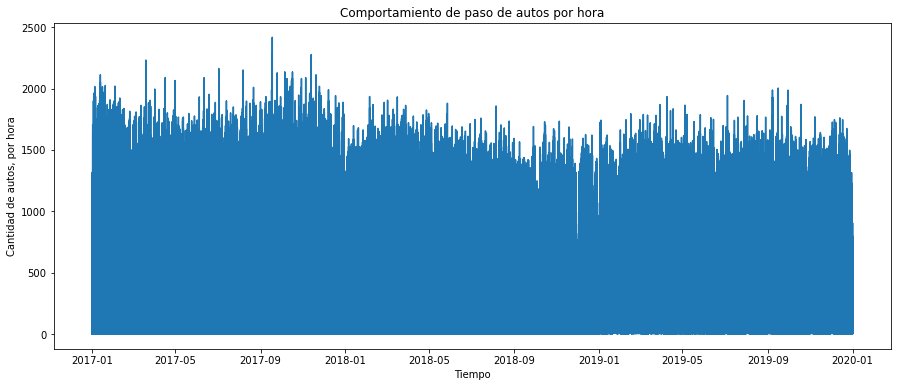

In [16]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.title('Comportamiento de paso de autos por hora')
plt.show()

In [17]:
#Resampleamos nuestros datos para agrupar por hora, 
hora = dataset.resample('12H', on = 'fecha').sum()
print(hora.shape)
hora.head()

(2190, 1)


,cantidad_pasos
fecha,
2017-01-01 00:00:00,10141
2017-01-01 12:00:00,21042
2017-01-02 00:00:00,20293
2017-01-02 12:00:00,31275
2017-01-03 00:00:00,19374


In [18]:
#Teniendo en cuenta la poca visibilidad de los datos, se efectuaa un resampleo por una unidad de desagregacion mas  grande
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


In [19]:
#Resampleamos los datos para agruparlos por semana
semana = dataset.resample('W', on = 'fecha').sum()
print(semana.shape)
semana.head()

(158, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581


In [20]:
#Resampleamos los datos para agruparlos por semana
Mensual = dataset.resample('M', on = 'fecha').sum()
print(Mensual.shape)
Mensual.head()

(36, 1)


,cantidad_pasos
fecha,
2017-01-31,1565260
2017-02-28,1363113
2017-03-31,1451214
2017-04-30,1373985
2017-05-31,1407136


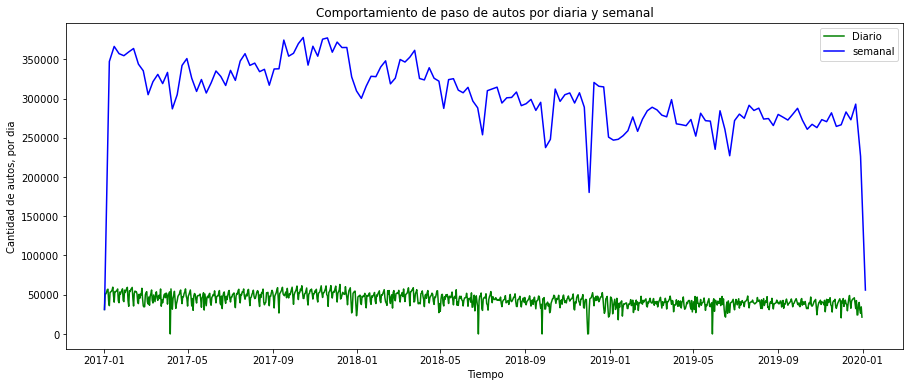

In [21]:
# Se fectua la visualizacion de los datos de manera diaria y semanal
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos, color='green', label = 'Diario')
plt.plot(semana.index, semana.cantidad_pasos,color ='blue',label='semanal')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title('Comportamiento de paso de autos por diaria y semanal')
plt.show()

In [22]:
hora.describe()

,cantidad_pasos
count,2190.000000
mean,21856.429680
std,8602.246577
min,0.000000
25%,14314.500000
50%,19452.000000
75%,29333.000000
max,42720.000000


In [23]:
diario.describe()

,cantidad_pasos
count,1095.000000
mean,43712.859361
std,8192.736927
min,0.000000
25%,39061.500000
50%,43761.000000
75%,49498.000000
max,63127.000000


In [24]:
semana.describe()

,cantidad_pasos
count,158.000000
mean,302946.715190
std,47342.854449
min,31183.000000
25%,276345.250000
50%,307094.000000
75%,334921.500000
max,377832.000000


In [25]:
Mensual.describe()

,cantidad_pasos
count,3.600000e+01
mean,1.329599e+06
std,1.478281e+05
min,1.103086e+06
25%,1.193708e+06
50%,1.336892e+06
75%,1.429054e+06
max,1.597356e+06


Tratamos de minimizar los valores atipicos para lograr una mejor visualización, para asi, reducir los picos que contienen los valores atipicos.

In [26]:
q25_col ,q75_col = np.nanpercentile(diario['cantidad_pasos'], [25,75])
iqr = q75_col-q25_col
mini = q25_col -1.5*iqr
print("Cota min es:", mini)

Cota min es: 23406.75


In [27]:
q25_col ,q75_col = np.nanpercentile(semana['cantidad_pasos'], [25,75])
iqr = q75_col-q25_col
mini = q25_col -1.5*iqr
print("Cota min es:", mini)

Cota min es: 188480.875


In [28]:

semanal_out = semana[semana.cantidad_pasos <= mini]
semanal_out

,cantidad_pasos
fecha,
2017-01-01,31183
2018-12-02,180328
2020-01-05,55970


In [29]:
intento_2 = diario.drop(diario[diario['cantidad_pasos']<= 23406.75].index)
intento_2

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486
...,...
2019-12-26,38168
2019-12-27,40182
2019-12-28,30681


In [30]:
semanal_2 = semana.drop(semana[semana['cantidad_pasos']<= mini].index)
semanal_2

,cantidad_pasos
fecha,
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581
2017-02-05,359401
...,...
2019-12-01,266555
2019-12-08,282891
2019-12-15,272960


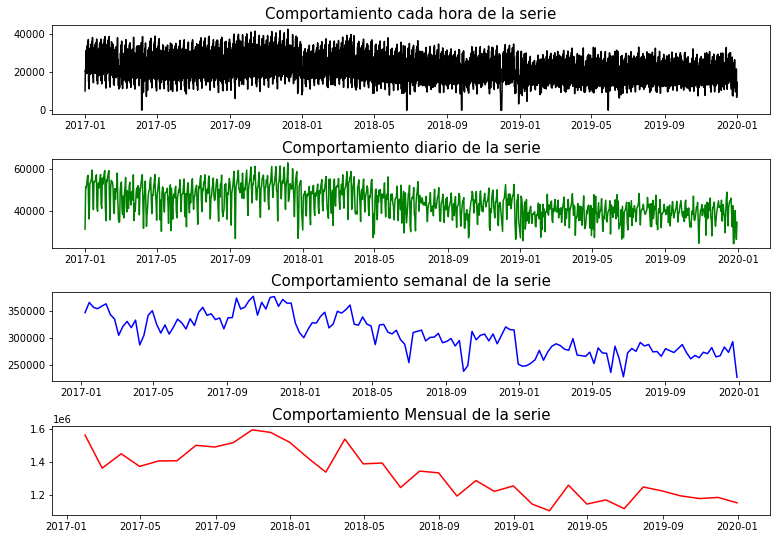

In [31]:
plt.subplot(411)
plt.plot(hora.index, hora.cantidad_pasos, color = 'black',label = 'Hora')
plt.title("Comportamiento cada hora de la serie", fontsize=15)

plt.subplot(412)
plt.plot(intento_2.index, intento_2.cantidad_pasos, color = 'green',label = 'Diario')
plt.title("Comportamiento diario de la serie", fontsize=15)


plt.subplot(413)
plt.plot(semanal_2.index, semanal_2.cantidad_pasos, color ='blue', label = 'Semanal')
plt.title("Comportamiento semanal de la serie", fontsize=15)

plt.subplot(414)
plt.plot(Mensual.index, Mensual.cantidad_pasos, color ='red', label = 'Mensual')
plt.title("Comportamiento Mensual de la serie", fontsize=15)


plt.subplots_adjust(left=0.04,
                    bottom=0.8, 
                    right=1.7, 
                    top=2.5, 
                    wspace=0.1, 
                    hspace=0.5)

plt.show()

Es posible notar, que conforme se disminuye el nivel de desagregacion del periodo o frecuencia de los datos, tenemos una visualizacion mas amena, sin embargo es de resaltar la perdida de variabilidad de la informacion. 
Simultaneamente es posible evidenciar que en niveles de desagregacion mayores (hora y dia), la serie parece tener un comportamiento estacionario, es decir que su media y varianza se mantienen constante. Sin embargo se sugiere validar posteriormente esto con una prueba de hipotesis.

Observemos la descomposición de cada serie anteriormente vista

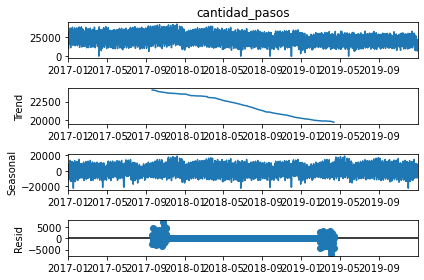

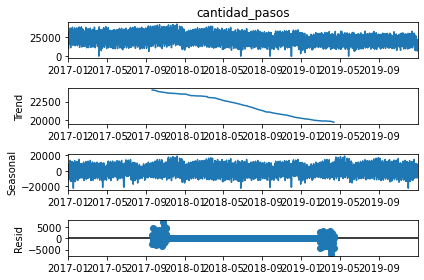

In [32]:
#descomposicion por hora
desc_hora=seasonal_decompose(hora['cantidad_pasos'], model='additive', period=1050)
desc_hora.plot()


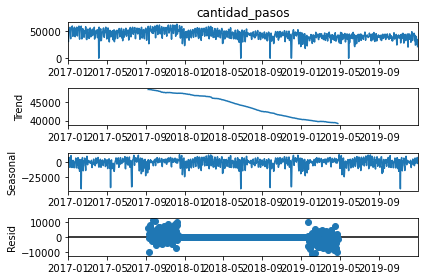

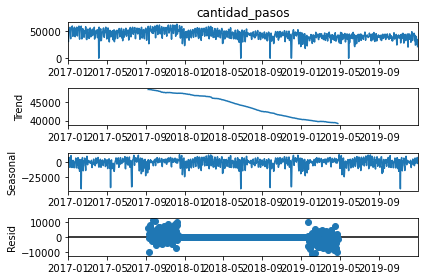

In [33]:
#descomposicion por dia
desc_diario=seasonal_decompose(diario['cantidad_pasos'], model='additive', period=500)
desc_diario.plot()

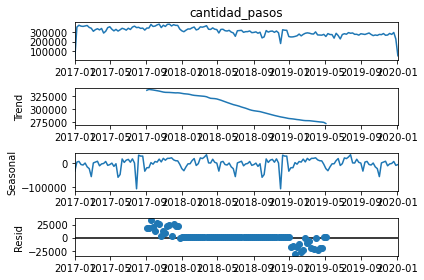

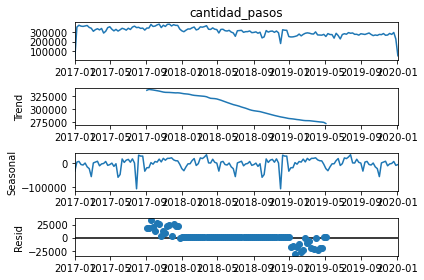

In [34]:
#descomposicion por semanal
desc_semana=seasonal_decompose(semana['cantidad_pasos'], model='additive', period=70)
desc_semana.plot()

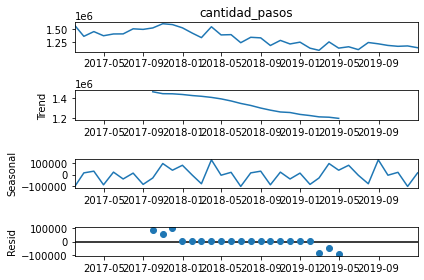

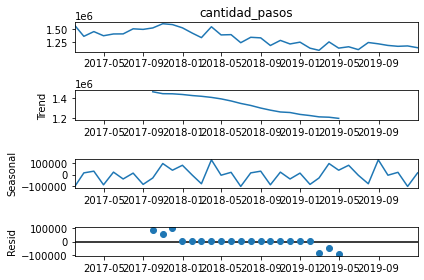

In [35]:
#descomposicion por mes
desc_mes=seasonal_decompose(Mensual['cantidad_pasos'], model='additive',period=17)
desc_mes.plot()

Observamos que para los 4 casos vistos el comportamiento no suele ser recurrente y se ve una tendencia negativa para en año 2019. Esto probablemente se atribuya a la pandemia.

Ahora bien,  se continuara con el análisis exploratorio de datos los cuales consistiran en verificar cuales son los vehiculos con mayor paso, los días en los cuales se tienen en promedio mas cantidad de vehiculos y finalmente se comparará estos resultados por año. 

##1.1 Exploracion de tipos de vehiculos de mayor trafico


In [36]:
dataset['hora'] = dataset['fecha'].dt.time
dataset['año'] = dataset['fecha'].dt.year

Text(0.5, 1.0, 'Cantidad de tipo de vehiculos según el año')

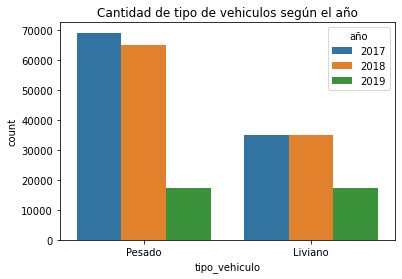

In [37]:
sns.countplot(data = dataset, x = "tipo_vehiculo", hue = 'año')
plt.title("Cantidad de tipo de vehiculos según el año")

Se puede concluir que para todos los años( menos el 2019) los vehiculos con mayor peso, han tenido mayor cantidad de pasos en comparación con los vehiculos livianos.

Text(0.5, 1.0, 'Cantidad de pasos por sentido según el año')

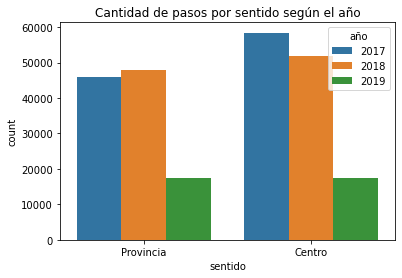

In [38]:
sns.countplot(data = dataset, x = "sentido", hue = 'año')
plt.title("Cantidad de pasos por sentido según el año")

Se observa que la cantidad de pasos es ligeramente superior para peajes asociados al centro, que a peajes asociados a la provincia.



##1.2- Comportamiento de los datos por año y día de la semana, promediando la cantidad de pasos de vehiculos.

In [39]:
#Datos por dia
data_2018['dia'] = data_2018['dia'].astype('category')
data_2019['dia'] = data_2019['dia'].astype('category')
data_2017['dia'] = data_2017['dia'].astype('category')


In [40]:
x_2019 = data_2019[['cantidad_pasos','dia']].groupby(by=['dia']).cantidad_pasos.mean().groupby(level=[0]).cumsum()
x_2019

dia
Domingo      134.756167
Jueves       166.291443
Lunes        155.300700
Martes       159.141576
Miércoles    163.404086
Sábado       145.114977
Viernes      166.571144
Name: cantidad_pasos, dtype: float64

In [41]:
x_2018 = data_2018[['cantidad_pasos','dia']].groupby(by=['dia']).cantidad_pasos.mean().groupby(level=[0]).cumsum()
x_2018

dia
Domingo      76.811658
Jueves       94.540396
Lunes        88.473009
Martes       91.844880
Miércoles    92.280314
Sábado       82.399653
Viernes      96.471708
Name: cantidad_pasos, dtype: float64

In [42]:
x_2017 = data_2017[['cantidad_pasos','dia']].groupby(by=['dia']).cantidad_pasos.mean().groupby(level=[0]).cumsum()
x_2017

dia
Domingo      77.296186
Jueves       96.498451
Lunes        89.996822
Martes       92.230193
Miércoles    95.222232
Sábado       84.134447
Viernes      98.091613
Name: cantidad_pasos, dtype: float64

In [43]:
#Se organizan  los dísa en el orden habitual.
dias = ["Lunes","Martes","Miércoles","Jueves","Viernes","Sábado","Domingo"]
dia1  = pd.api.types.CategoricalDtype(categories=dias)
dataset['dia'] = dataset['dia'].astype(dia1)

Text(0.5, 1.0, 'Cantidad de pasos por día para cada año')

<Figure size 648x1080 with 0 Axes>

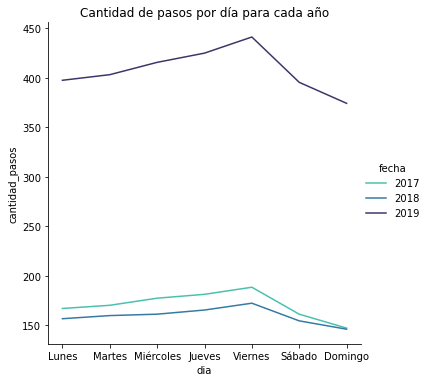

In [44]:
#Se grafica la cantidad de pasos discriminado por dias
palette=sns.color_palette("mako_r",3)
plt.figure(figsize =(9,15))
sns.relplot(dashes=True,kind = 'line',ci=None,data = dataset, y = dataset['cantidad_pasos'], x = 'dia', hue=dataset['fecha'].dt.year, markers = True, palette = palette )
plt.title('Cantidad de pasos por día para cada año')

Por un lado, observamos que existe un incremento en cuando a la cantidad de pasos para el año 2019. Teniendo en cuenta el anterior comportamiento, suponemos que puede estar explicado por la pandemia, es asi como,  más adelante se intentará discriminar esta situación intentando mapear el inicio de la misma.

Por otro lado, el comportamiento atravez de los años (2017 & 2018) es similar, se observa un pico para los días viernes y una caida para los días domingos.

In [45]:
#Se reajustar el formato de las variables del dataset
dataset['hora'] = dataset['fecha'].dt.time
dataset['año'] = dataset['fecha'].dt.year

Text(0.5, 1.0, 'Cantidad de pasos en los tres años')

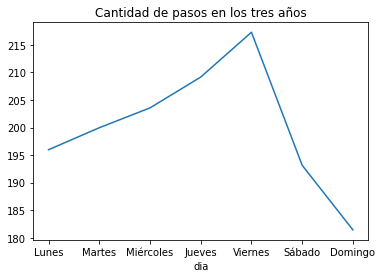

In [46]:
#Se evalua el comportamiento promedio de los peajes para los 3 años.
dataset[['cantidad_pasos','dia','año']].groupby(('dia')).cantidad_pasos.mean().groupby(level=[0]).cumsum().plot.line()
plt.title('Cantidad de pasos en los tres años')    

Es posible evidenciar que el viernes sigue siendo el dia de mayor flujo vehicular, para los 3 años estudiados

Text(0.5, 1.0, 'Cantidad de pasos por hora')

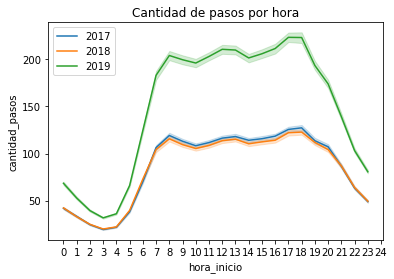

In [47]:
# Se evalua el comportamiento de los pasos por los peajes, teniendo encuenta la hora de trafico vehicular
sns.lineplot(data = data_2017, y = data_2017.cantidad_pasos, x = 'hora_inicio',legend='auto', markers = True, label='2017')
sns.lineplot(data = data_2018, y = data_2018.cantidad_pasos, x = 'hora_inicio',legend='auto',label='2018')
sns.lineplot(data = data_2019, y = data_2019.cantidad_pasos, x = 'hora_inicio',legend='auto',label = '2019')
plt.legend()
plt.xticks([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.title("Cantidad de pasos por hora")

Teniendo en cuenta la anterior grafica, se evidencia un comportamiento similar entre los años, endonde es posible evidenciar que el mayor trafico de carros se da entre las 8 am y las 10pm.

<AxesSubplot:xlabel='hora'>

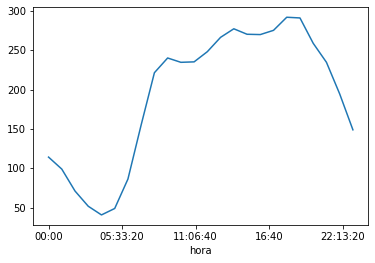

In [48]:
dataset[['cantidad_pasos','hora','año']].groupby(('hora')).cantidad_pasos.mean().groupby(level=[0]).cumsum().plot.line()

En promedio el mayor pico de transito vehicular se presenta entre las 6pm-8pm.

## 1.3 Análisis con cambio de metodo de pago a TelePase
Se procede a realizar el mismo analisis exploratorio anterior, pero con el dataset filtrado por metodo de pago: "Telepase" con el fin de observar potenciales cambios en el comportamiento de la cantidad de pasos y la variación con respeto al método de pago "Efectivo"

In [49]:
print(data_2019_2['forma_pago'].unique())
print(data_2018_2['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']


In [50]:
#Unimos los 2 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_2 = pd.concat([data_2019_2, data_2018_2])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset_2.estacion=='Illia', dataset_2.forma_pago == 'TELEPASE')
dataset_2 = dataset_2[mask]

#Quitamos las columnas que no vamos a utilizar
dataset_2.drop(columns = ['periodo','hora_inicio'], inplace = True)
dataset_2.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset_2.head()

,fecha,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
20,2019-01-01,1,Martes,Illia,Centro,Liviano,TELEPASE,59
21,2019-01-01,1,Martes,Illia,Centro,Pesado,TELEPASE,1
23,2019-01-01,1,Martes,Illia,Provincia,Liviano,TELEPASE,106
25,2019-01-01,1,Martes,Illia,Provincia,Pesado,TELEPASE,2
85,2019-01-01,2,Martes,Illia,Centro,Liviano,TELEPASE,507


In [51]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_2['fecha2'] = pd.to_datetime(dataset_2.fecha) + pd.to_timedelta(dataset_2.hora_fin, unit = 'h')
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_2.drop(columns=['fecha','hora_fin'], inplace = True)
dataset_2.head()

,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha2
20,Martes,Illia,Centro,Liviano,TELEPASE,59,2019-01-01 01:00:00
21,Martes,Illia,Centro,Pesado,TELEPASE,1,2019-01-01 01:00:00
23,Martes,Illia,Provincia,Liviano,TELEPASE,106,2019-01-01 01:00:00
25,Martes,Illia,Provincia,Pesado,TELEPASE,2,2019-01-01 01:00:00
85,Martes,Illia,Centro,Liviano,TELEPASE,507,2019-01-01 02:00:00


In [52]:
dataset_2.rename(columns = {'fecha2':'fecha'}, inplace = True) 

In [53]:
dataset_2.sort_values('fecha', inplace = True)
dataset_2.reset_index(drop=True, inplace = True)

In [54]:
hora_1 = dataset_2.resample('12H', on = 'fecha').sum()
print(hora_1.shape)

(1460, 1)


In [55]:
diario_2 = dataset_2.resample('D', on = 'fecha').sum()
print(diario_2.shape)

(730, 1)


In [56]:
semana_2 = dataset_2.resample('W', on = 'fecha').sum()
print(semana_2.shape)

(105, 1)


In [57]:
#Resampleamos los datos para agruparlos por semana
Mensual_2 = dataset_2.resample('M', on = 'fecha').sum()
print(Mensual_2.shape)


(24, 1)


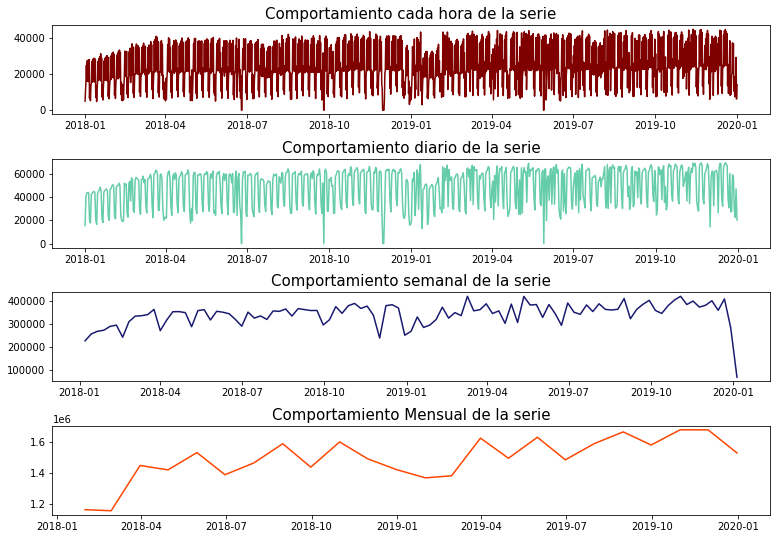

In [58]:
plt.subplot(411)
plt.plot(hora_1.index, hora_1.cantidad_pasos, color = 'Maroon',label = 'Hora')
plt.title("Comportamiento cada hora de la serie", fontsize=15)

plt.subplot(412)
plt.plot(diario_2.index, diario_2.cantidad_pasos, color = 'MediumAquamarine',label = 'Telepase')
plt.title("Comportamiento diario de la serie", fontsize=15)


plt.subplot(413)
plt.plot(semana_2.index, semana_2.cantidad_pasos, color ='MidnightBlue', label = 'Semanal')
plt.title("Comportamiento semanal de la serie", fontsize=15)

plt.subplot(414)
plt.plot(Mensual_2.index, Mensual_2.cantidad_pasos, color ='OrangeRed', label = 'Mensual')
plt.title("Comportamiento Mensual de la serie", fontsize=15)


plt.subplots_adjust(left=0.04,
                    bottom=0.8, 
                    right=1.7, 
                    top=2.5, 
                    wspace=0.1, 
                    hspace=0.5)

plt.show()

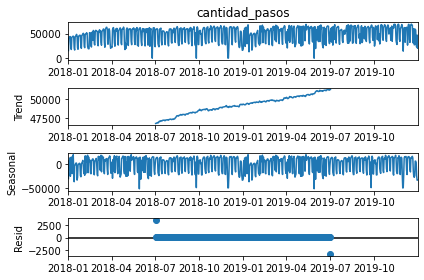

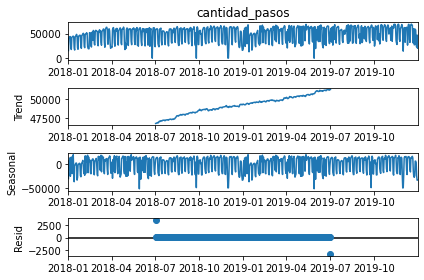

In [59]:
#descomposicion por dia
desc_diario_1=seasonal_decompose(diario_2['cantidad_pasos'], model='additive', period=365)
desc_diario_1.plot()

Aqui se observa una clara diferencia con respecto al metodo de pago 'Efectivo' y 'Telepase', pues mientras en Efectivo observabamos una tendencia negativa con respecto a la cantidad de transito de vehiculos que usaban esta opción de pago. Con la opcion de TelePase, implementada desde el 2013, existe una opción más agil de realizar el pago del  peaje, ya que este consta de ubicar un dispositivo en el parabrisas de los vehiculos el cual permite realizar viajes sin necesidad de detenerse en los puntos de cobro. Lo anterior, gracias a que este dispositivo permite metodos de pago alternativos como denito automatico, tarjeta de credito, mercado pago, entre otros  .


Teniendo en cuenta lo anterior e investigando, se encontro que este comportamiento se debe a que alianzas entre los concesionarios  y  dueños de vehiculos argentinos, introducieron este sistema desde enero de 2019, en un numero  considerable de vehiculos. Esto, explicaria el comportamiento decreciente del tipo de pago'Efectivo' con respescto al telepase, pues esta medida se convirtio un sustituto perfecto del metodo de  pago tradicional, incrementando el uso de TelePase vs Efectivo.

Text(0.5, 1.0, 'Cantidad de pasos por día para cada año')

<Figure size 648x1080 with 0 Axes>

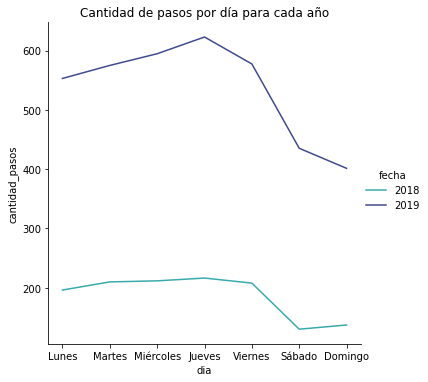

In [60]:
#Gráfica de flujo vehicular por día discriminado por año para vehiculos con metodo de pago- Telepase
palette=sns.color_palette("mako_r",2)
plt.figure(figsize =(9,15))
sns.relplot(dashes=True,kind = 'line',ci=None,data = dataset_2, y = dataset_2['cantidad_pasos'], x = 'dia', hue=dataset_2['fecha'].dt.year, markers = True, palette = palette )
plt.title('Cantidad de pasos por día para cada año')

Text(0.5, 1.0, 'Cantidad de pasos por hora')

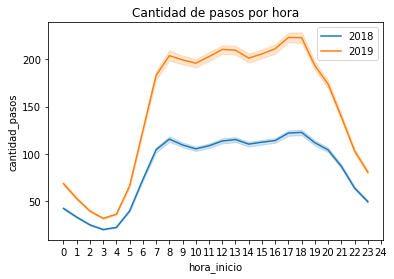

In [61]:
#sns.lineplot(data = data_2017, y = data_2017.cantidad_pasos, x = 'hora_inicio',legend='auto', markers = True, label='2017')
sns.lineplot(data = data_2018_2, y = data_2018_2.cantidad_pasos, x = 'hora_inicio',legend='auto',label='2018')
sns.lineplot(data = data_2019_2, y = data_2019_2.cantidad_pasos, x = 'hora_inicio',legend='auto',label = '2019')
plt.legend()
plt.xticks([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.title("Cantidad de pasos por hora")

Lo que podemos observar con respecto a los comportamientos en los días de la semana y en las horas del día, es muy similar a los resultados obtenidos con el metodo de pago en efectivo.

In [62]:
dataset_2['hora'] = dataset_2['fecha'].dt.time
dataset_2['año'] = dataset_2['fecha'].dt.year

Text(0.5, 1.0, 'Cantidad de tipo de vehiculos según el año')

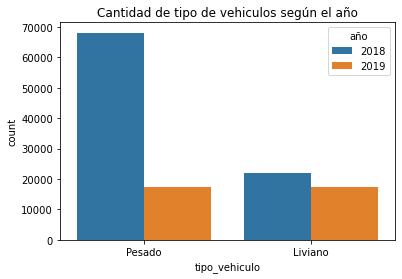

In [63]:
sns.countplot(data = dataset_2, x = "tipo_vehiculo", hue = 'año')
plt.title("Cantidad de tipo de vehiculos según el año")

Para el paso de vehiculos livianos se observa una disminución en la cantidad de pasos con el metodo de pago TelePase con respecto al efectivo en el 2018.

##1.4 Analisis de autocorrelación por Dia

En esta parte se revisara la autocorrelación por día con el método de autocorrelación simple ACF, recordamos que el intervalo de confianza esta dado por defecto en 95% y gráficamente es el cono que se forma en Azul, lo que implica que los valores de autocorrelacion por fuera de dicho intervalo es muy probable sean una correlación. La idea es observar los resultados por día en periodos de 1, 2 y 3 años.

In [64]:
dataset_copy = dataset.copy()
dataset_copy = dataset_copy.drop('año', axis=1)

In [65]:
dataset_auto = dataset_copy.resample('D', on = 'fecha').sum()
print(dataset_auto.shape)
dataset_auto

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486
...,...
2019-12-27,40182
2019-12-28,30681
2019-12-29,26259


In [66]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fast')

In [67]:
dias = 365 # Cantidad de días en 1 año.
años = 1 # Cantidad de años observados.

nlong= dias*años
autocorr = stattools.acf(dataset_auto, nlags= nlong)
autocorr.shape

(366,)

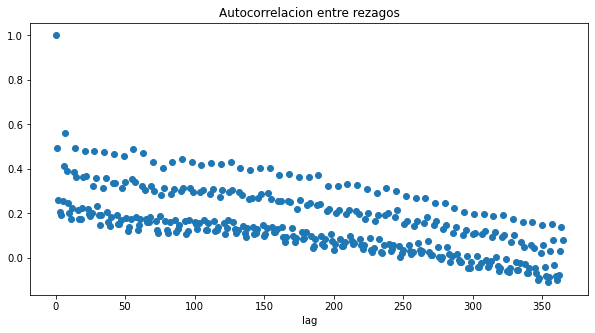

In [68]:

plt.figure(figsize = (10,5))
plt.scatter(np.arange(nlong+1), autocorr)
plt.xlabel('lag')
plt.title('Autocorrelacion entre rezagos')
plt.show()

<Figure size 720x720 with 0 Axes>

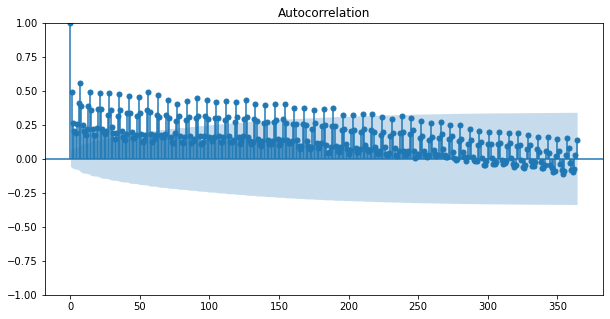

In [69]:
plt.figure(figsize = (10,10))
plot_acf(dataset_auto, lags = np.arange(nlong))
plt.show()

In [70]:
nlong_1= dias*2
autocorr_1 = stattools.acf(dataset_auto, nlags= nlong_1)
autocorr_1.shape

(731,)

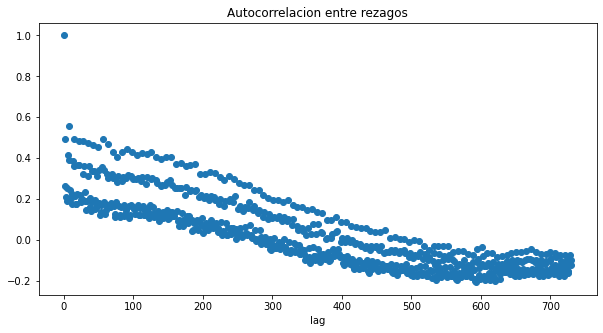

In [71]:

plt.figure(figsize = (10,5))
plt.scatter(np.arange(nlong_1+1), autocorr_1)
plt.xlabel('lag')
plt.title('Autocorrelacion entre rezagos')
plt.show()

<Figure size 720x360 with 0 Axes>

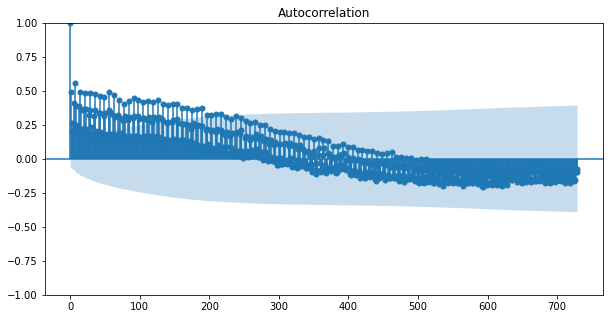

In [72]:
plt.figure(figsize = (10,5))
plot_acf(dataset_auto, lags = np.arange(nlong_1))
plt.show()

In [73]:
nlong_2= dias*3
autocorr_2 = stattools.acf(dataset_auto, nlags= nlong_2)
autocorr_2.shape

(1095,)

<Figure size 1000x1600 with 0 Axes>

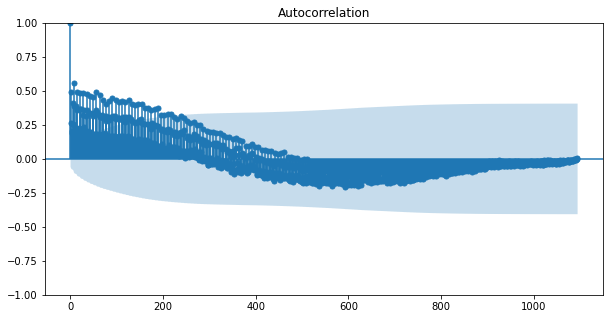

In [74]:
plt.figure(figsize=(10, 16), dpi=100)
plot_acf(dataset_auto, lags = np.arange(nlong_2))
plt.show()

In [75]:
from statsmodels.tsa.stattools import adfuller

Prueba de Dickey-Fuller para probar estacionariedad

In [76]:
test= adfuller(dataset_auto['cantidad_pasos'])
print('Test DF: {}'.format(test[0]))
print('p-value: {}'.format(test[1]))
print('Critical Values:')
for key, value in test[4].items():
    print('\t{}: {}'.format(key, value))

Test DF: -2.1855865595703032
p-value: 0.21151823124613317
Critical Values:
	1%: -3.4364533503600962
	5%: -2.864234857527328
	10%: -2.568204837482531


A partir de lo anterior, dado que la Hipotesis H_0 : No es estacionaria (raiz unitaria) > 0.05. Luego la serie no es estacionaria al ser mayor que el nivel de significancia. Se realizaran dos diferencia para revisar como nos da la autocorrelacion y luego volver a realizar la prueba de Dickey-Fuller

In [77]:
from pylab import rcParams
from numpy import log
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

Evaluemos la estacionariedad de la serie díaria con el fin de ver la viabilidad de empleación del módelo ARIMA, con ayuda de la diferencialización de la serie.

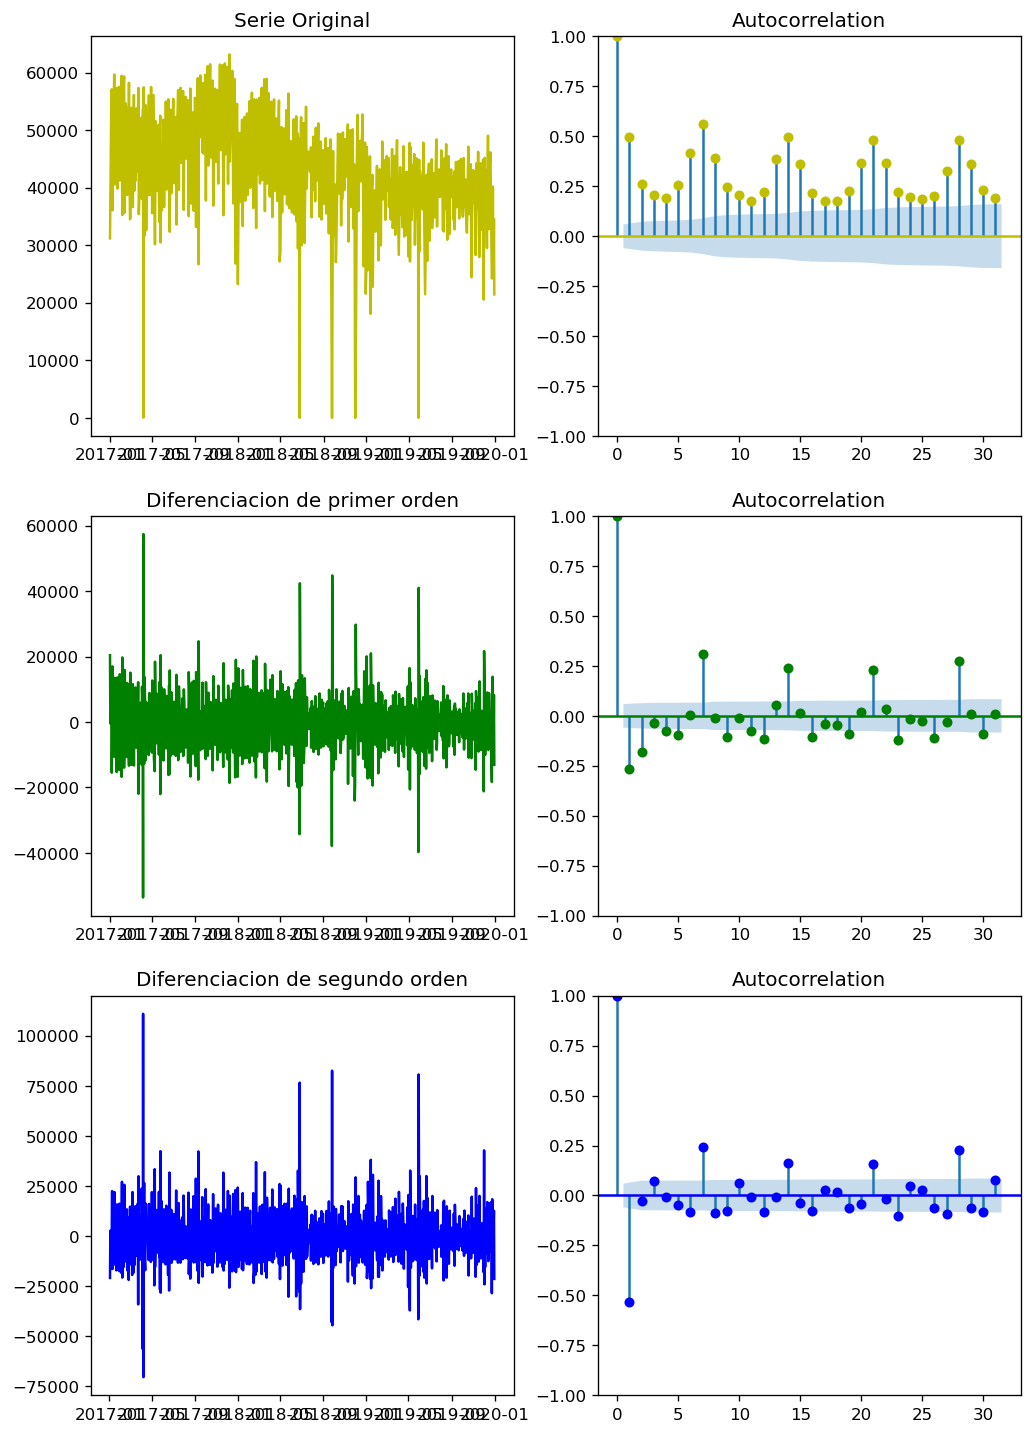

In [78]:
plt.rcParams.update({'figure.figsize':(10,15), 'figure.dpi':120})
#Serie original
fig, axes = plt.subplots(3,2, sharex = False)
axes[0, 0 ].plot(dataset_auto, color = "y"); axes[0,0].set_title('Serie Original')
plot_acf(dataset_auto, ax=axes[0,1], color="y")

#Primera diferenciacion

axes[1, 0 ].plot(dataset_auto.diff(), color = "g"); axes[1,0].set_title('Diferenciacion de primer orden')
plot_acf(dataset_auto.diff().dropna(), ax=axes[1,1], color="g")

#Primera diferenciacion

axes[2, 0 ].plot(dataset_auto.diff().diff(), color = "b"); axes[2,0].set_title('Diferenciacion de segundo orden')
plot_acf(dataset_auto.diff().diff().dropna(), ax=axes[2,1], color="b")

plt.show()

Observemos que con los resultados obtenidos de las diferencializaciones de la serie se podría pensar que alcanza la estacionariedad con dos diferenciaciones pero al ver el gráfico de autocorrelaciones, el retraso entra a la zona negativa lejana bastante rápido lo que podría indicar una sobrediferenciación.

In [79]:
#Segunda prueba de Dickey-Fuller con los datos diferenciados 1 vez
Result = adfuller(dataset_auto.diff().dropna())
print('Test DF: {}'.format(Result[0]))
print('p-value: {}'.format(Result[1]))

Test DF: -12.291723116775902
p-value: 7.799866854196754e-23


In [80]:
#Segunda prueba de Dickey-Fuller con los datos diferenciados 2 veces
Result = adfuller(dataset_auto.diff().diff().dropna())
print('Test DF: {}'.format(Result[0]))
print('p-value: {}'.format(Result[1]))

Test DF: -14.290309306625588
p-value: 1.2789465368249369e-26


In [81]:
#Segunda prueba de Dickey-Fuller con los datos diferenciados 4 veces
Result = adfuller(dataset_auto.diff().diff().diff().diff().dropna())
print('Test DF: {}'.format(Result[0]))
print('p-value: {}'.format(Result[1]))

Test DF: -19.89663818547398
p-value: 0.0


Observamos que para los datos diarios, con la segunda diferenciacion, podemos rechazar la HO=No estacionariedad, ya que el p-value es inferior a 0.05. Asi mismo se puede eviidenciar que mas de dos diferenciaciones podria estar sobrediferenciando la serie.

# 1.5 Analisis de Autocorrelación Mensual


In [82]:
dataset_auto_m = dataset_copy.resample('M', on = 'fecha').sum()

In [83]:
# Se construye datos para analisis mensual
months = 12 
years = 1 

nlong_m= months*years           
autocorr_m = stattools.acf(dataset_auto_m, nlags= nlong_m)
autocorr_m.shape

(13,)

<Figure size 600x600 with 0 Axes>

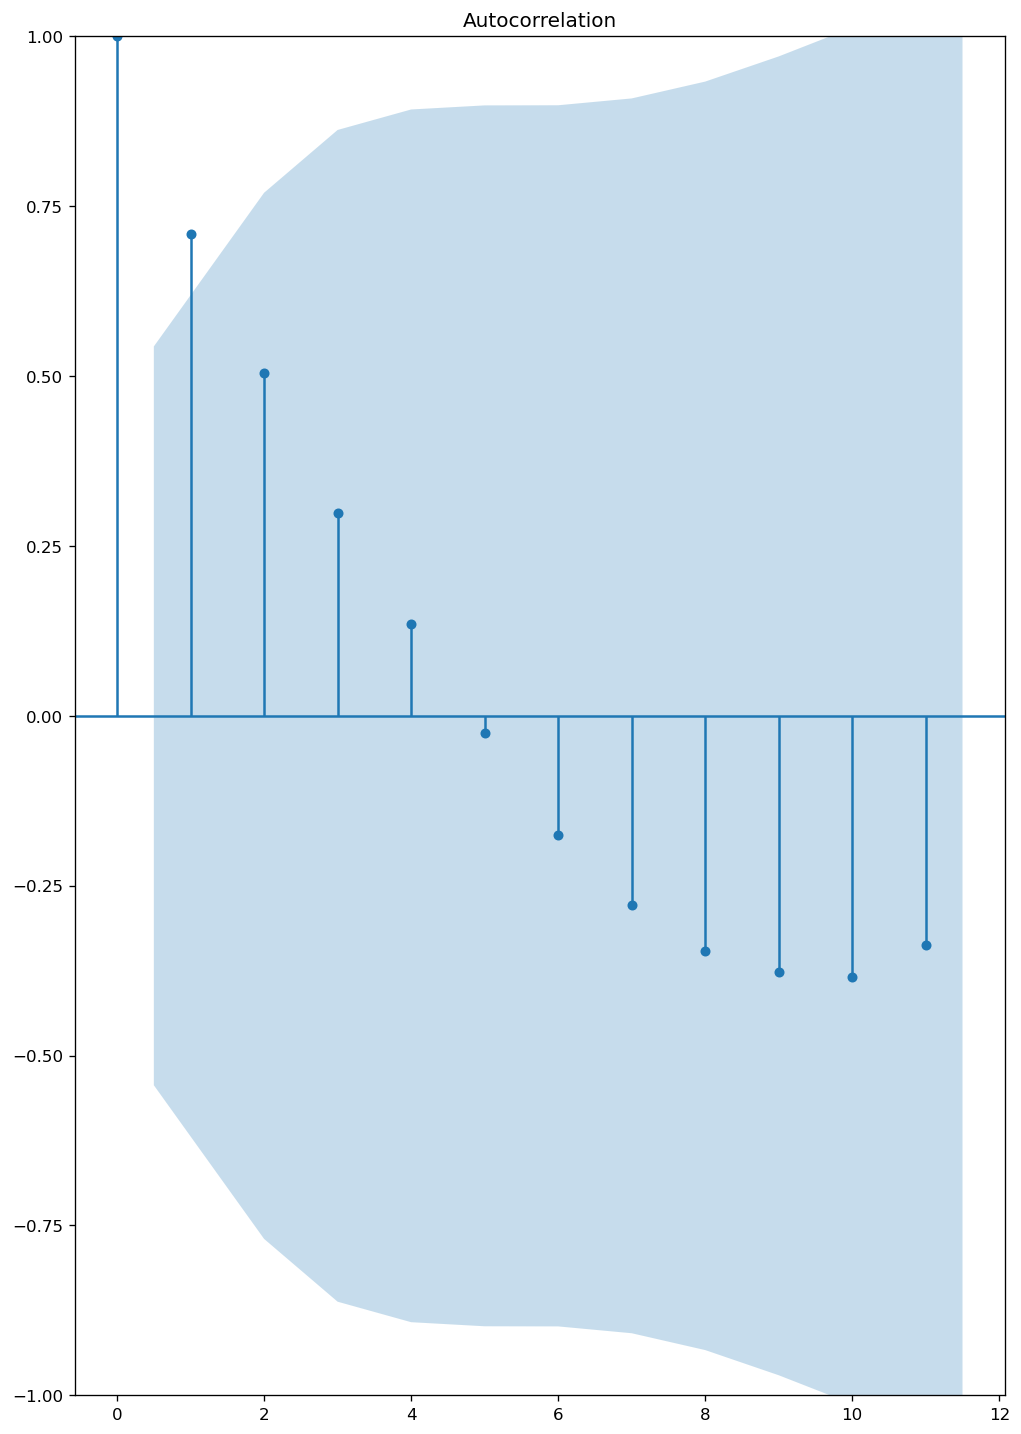

In [84]:
plt.figure(figsize = (5,5))
plot_acf(autocorr_m, lags = np.arange(nlong_m))
plt.show()

In [85]:
nlong_m1= months*2          
autocorr_m1 = stattools.acf(dataset_auto_m, nlags= nlong_m1)
autocorr_m1.shape

(25,)

Realizando el grafico de autocorrelación mensual, es posible  visualizar de mejor  manera los datos, permitiendo ademas, ver los intervalos de confianza ydistinguiendo los datos necesarios para la predicción.

<Figure size 600x600 with 0 Axes>

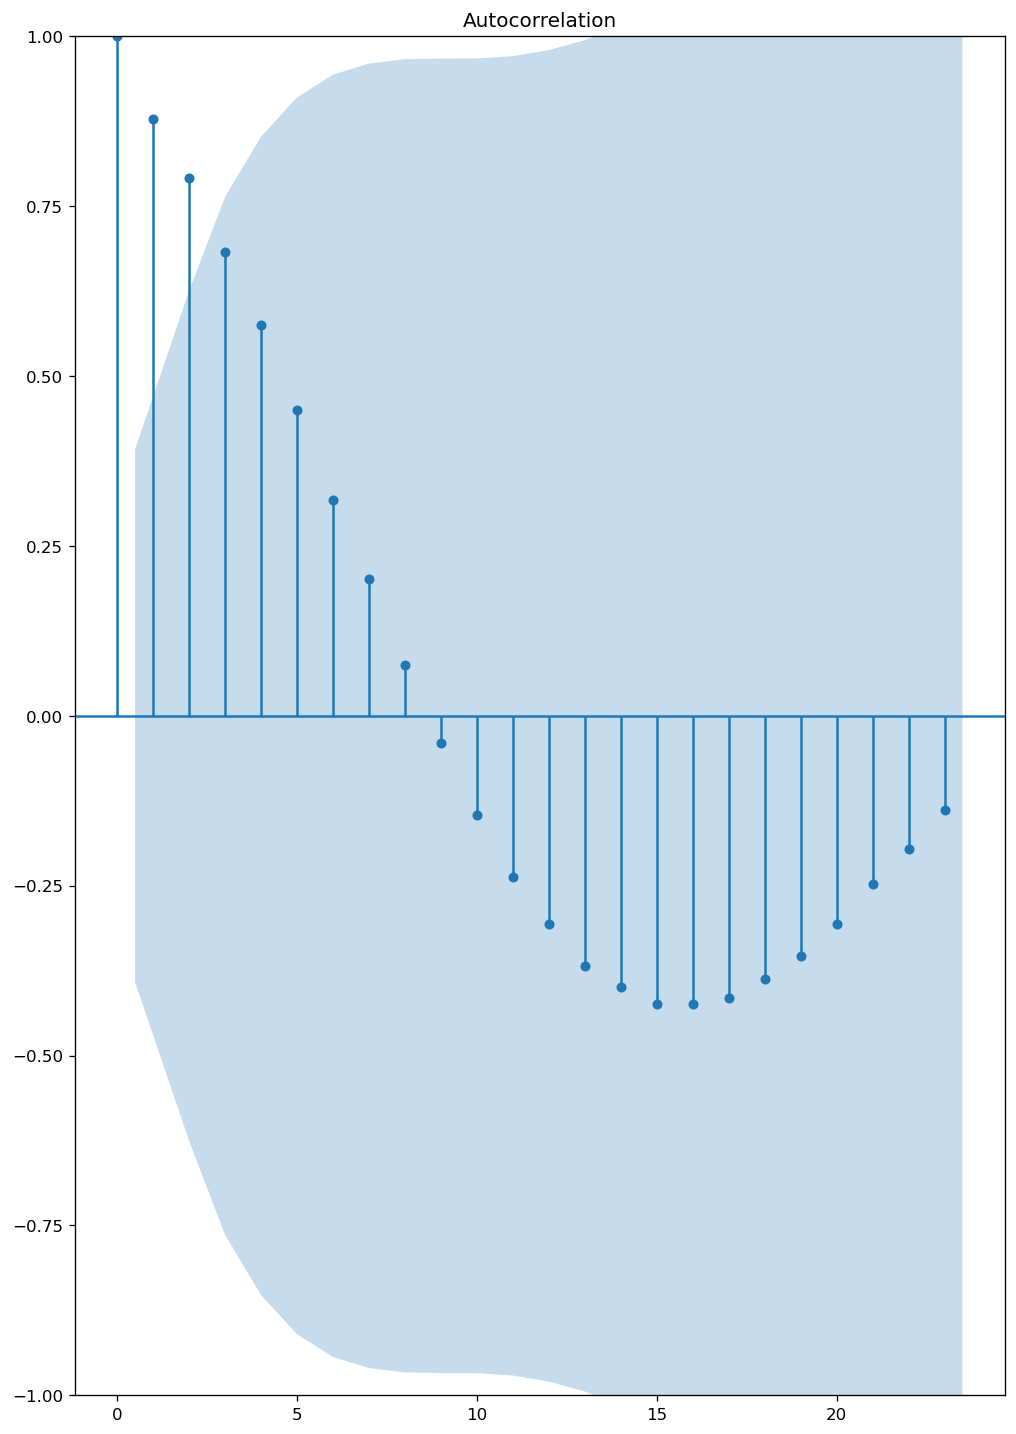

In [86]:
plt.figure(figsize = (5,5))
plot_acf(autocorr_m1, lags = np.arange(nlong_m1))
plt.show()

In [87]:
test= adfuller(dataset_auto_m['cantidad_pasos'])
print('Test DF: {}'.format(test[0]))
print('p-value: {}'.format(test[1]))
print('Critical Values:')
for key, value in test[4].items():
    print('\t{}: {}'.format(key, value))

Test DF: -0.9087551969878283
p-value: 0.785075533608167
Critical Values:
	1%: -3.6996079738860943
	5%: -2.9764303469999494
	10%: -2.627601001371742


 A partir de lo anterior, dado que la Hipotesis H_0 : No es estacionaria (raiz unitaria) p-value=0.78 > 0.05, la serie no es estacionaria al ser mayor que el nivel de significancia. Se procede a  realizar dos diferenciaciones para revisar como nos da la autocorrelacion y luego volver a realizar la prueba de Dickey-Fuller
 



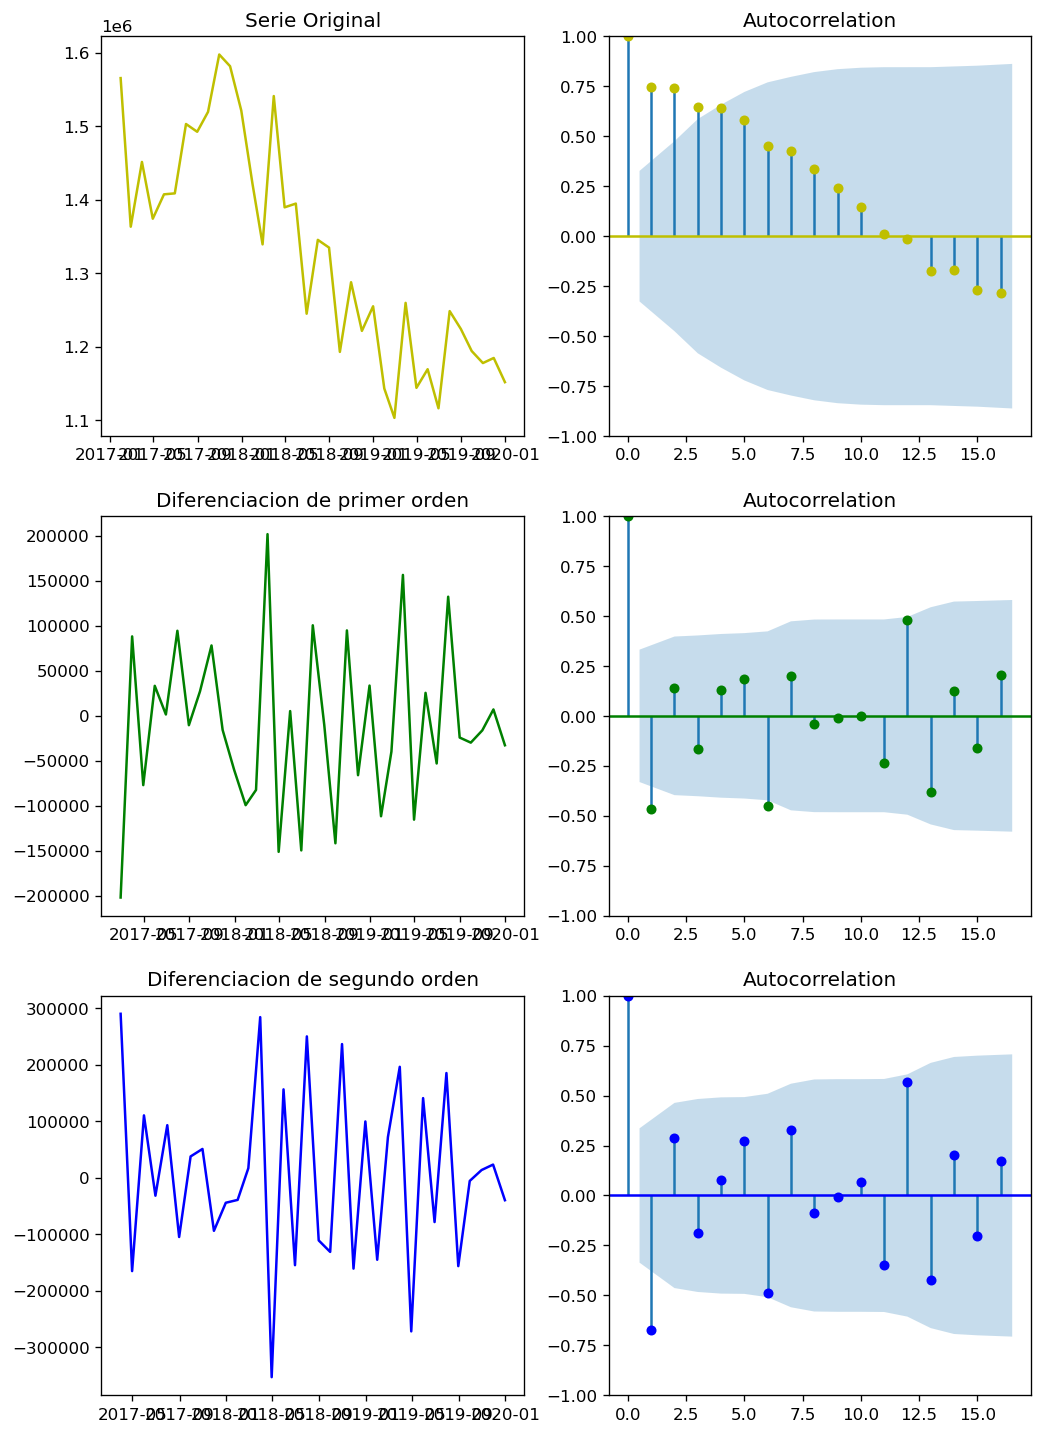

In [88]:
plt.rcParams.update({'figure.figsize':(10,15), 'figure.dpi':120})
#Serie original
fig, axes = plt.subplots(3,2, sharex = False)
axes[0, 0 ].plot(dataset_auto_m, color = "y"); axes[0,0].set_title('Serie Original')
plot_acf(dataset_auto_m, ax=axes[0,1], color="y")

#Primera diferenciacion

axes[1, 0 ].plot(dataset_auto_m.diff(), color = "g"); axes[1,0].set_title('Diferenciacion de primer orden')
plot_acf(dataset_auto_m.diff().dropna(), ax=axes[1,1], color="g")

#Primera diferenciacion

axes[2, 0 ].plot(dataset_auto_m.diff().diff(), color = "b"); axes[2,0].set_title('Diferenciacion de segundo orden')
plot_acf(dataset_auto_m.diff().diff().dropna(), ax=axes[2,1], color="b")

plt.show()

In [89]:
#Segunda prueba de Dickey-Fuller con los datos diferenciados 1 vez
Result = adfuller(dataset_auto_m.diff().dropna())
print('Test DF: {}'.format(Result[0]))
print('p-value: {}'.format(Result[1]))

Test DF: -2.923481114304552
p-value: 0.042684808776006555


In [90]:
#Segunda prueba de Dickey-Fuller con los datos diferenciados 2 vez
Result = adfuller(dataset_auto_m.diff().diff().dropna())
print('Test DF: {}'.format(Result[0]))
print('p-value: {}'.format(Result[1]))

Test DF: -2.558238655835016
p-value: 0.10193926171427342


Observamos que para la serie mensual,  se puede rechazar la hipotesis de no estacionariedad desde la primera diferenciación.Sin embargo,  consideramos que los resultados mensuales no generan mucha variabilidad a la serie, lo cual no permite capturar de manera adecuada el comportamiento de la serie, afectando asi, la proyeccion.



### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

# 2. Prediccion del ultimo trimestre de 2019

Tomando en cuenta que analizar la serie con datos diarios aumenta la variabilidad de los datos y dificulta ampliamente su visualizacion,  y  que con la informacion mensual, perdemos una alta variabilidad que permite un mejor ajuste de los datos para una mejor prediccion. La prediccion de los datos del ultimo semestre se va a efectuar con los datos semanales.

In [91]:
# Se separa el dataset. respectivamente con los datos anteriores a este trimestre y  se procede a hacer la prediccion 
start='2019-10-01'
finish='2019-12-31'
X=semana [(semana.index >=start)&(semana.index <=finish)]
start='2019-07-01'
finish='2019-09-30'
y_true= semana [(semana.index >=start)&(semana.index <=finish)]
y_pred=X.rolling(window=1, center=True).mean()

## Metricas



 Para evaluar el desempeño de este modelo, se seleccionaron 2 metricas:  "MAE" y "RMSE". Estas metricas se eligieron por encima de otras metricas porque; dado que necesitamos efectuar una buena prediccion, el MAE  y el RMSE son metricas que penalizan las predicciones con amplios errores, por lo tanto utilizando estas metricas vamos a evaluar consistentemente los errores del modelo.

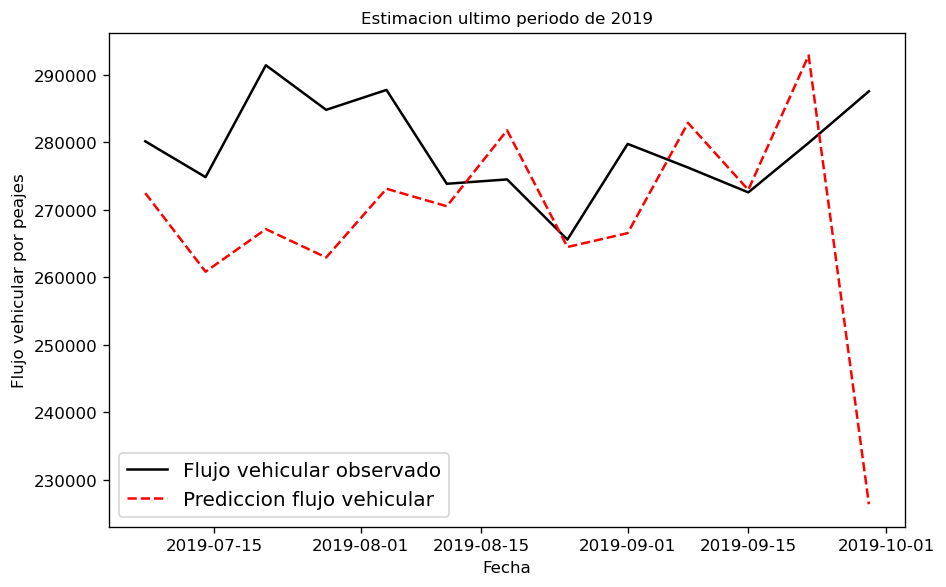

 Resultado MAE:  [14502.38461538]
Resultado RMSE:  20998.801062844588


In [92]:
#MAE
MAE=mean_absolute_error(y_true, y_pred, multioutput='raw_values')
plt.figure(figsize=(8,5))
plt.plot(y_true.index, y_true,color='black', label='Flujo vehicular observado')
plt.plot(y_true.index, y_pred, '--', color='red',label='Prediccion flujo vehicular')
plt.xlabel('Fecha', fontsize=10)
plt.ylabel('Flujo vehicular por peajes',fontsize=10)
plt.title ('Estimacion ultimo periodo de 2019', fontsize=10)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
#RMSE
rmse=np.sqrt(mean_squared_error(y_pred, y_true))
print(f' Resultado MAE:  {MAE}')
print(f'Resultado RMSE:  {rmse}')

Teniendo encuenta los anteriores resultados, es posible evidenciar que el modelo base no cumple con las expectativas para la prediccion, pues el error evaluado para ambas metricas es muy alto. A pesar de lo anterior, se va a utilizar el random forest como algoritmo de prediccion,  con el fin de evaluar un mejor desempeño.

##3. Modelo Benckmark Ramdom forest

In [93]:
# Se utilizan todos los meses para predecir el ultimo trimestre del año 2019
LB=12

In [94]:
S = semana.shape[0]
X = np.zeros((S - LB - 1,LB))
y = np.zeros(S - LB - 1)
print(X.shape, y.shape)

(145, 12) (145,)


In [95]:
for i in range(X.shape[0]):
    X[i,:] = semana.iloc[i:i+LB].transpose()
    y[i] = semana.iloc[i+LB]

In [96]:
S_train = 145 - LB 
S_test = 12
S_total = S_train + S_test

Total = S_train + S_test + LB

X_train = X[:S_train,:]
y_train = y[:S_train]
print(X_train.shape, y_train.shape)

X_test = X[S_train:S_train+S_test,:]
y_test = y[S_train:S_train+S_test]
print(X_test.shape, y_test.shape)

(133, 12) (133,)
(12, 12) (12,)


In [97]:
y_test = y[S_train:S_train+S_test]
print(y_test)

[260840. 267147. 262950. 273129. 270536. 281790. 264500. 266555. 282891.
 272960. 292881. 226390.]


In [98]:

rf = RandomForestRegressor( n_jobs = -1)
rf.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [99]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

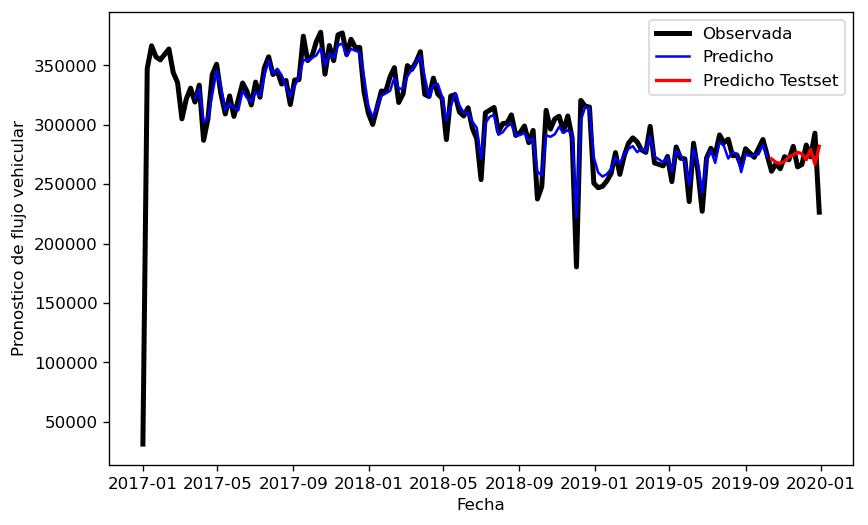

MAE Train: 6458.322781954888
MAE  Test: 12624.75
RMSE Train: 8670.196171875541
RMSE Test: 19113.50582993127


In [100]:
plt.figure(figsize=(8,5))
plt.plot(semana.index[:Total], semana[:Total],lw = 3, color='black', label = 'Observada')
plt.plot(semana.index[LB: LB + S_train], y_train_pred, color='blue',label = 'Predicho')
plt.plot(semana.index[S_train+LB: Total], y_test_pred,color='red', lw = 2, label = 'Predicho Testset')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Pronostico de flujo vehicular', fontsize=10)
plt.show()
MAE=mean_absolute_error(y_train, y_train_pred)
print('MAE Train:', MAE)
MAE=mean_absolute_error(y_test, y_test_pred)
print('MAE  Test:', MAE)
rmse =np.sqrt( mean_squared_error(y_train, y_train_pred))
print('RMSE Train:',rmse)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE Test:', rmse)

Si bien es posible evidenciar un mejor ajuste a la serie, es importante  efectuar una optimizacion de hiperparametros para que los errores disminuyan y asi aumentar la precision de la prediccion.

In [101]:
tss= TimeSeriesSplit(n_splits=2)

## 4. Optimizacion de hiperparametros

Como aun existen oportunidades de mejora en el ajuste del modelo , se procede a utilizar el algoritmo de Gridsearch para optimizar los hiperparametros. Lo anterior,  con el ojetivo de  mirar si el modelo base o (benckmarck) mejora su desempeño con la optimizacion.

In [102]:
param_grid = {'n_estimators':[25, 50, 75, 100, 125, 150, 175, 200],
              'max_depth': [i for i in range(1,50)],
              'max_features': ['auto', 'sqrt', 'log2'], 
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4, 6]} 
rf_reg=RandomForestRegressor(random_state=42)
rf_gs =GridSearchCV(rf_reg, param_grid, scoring='neg_root_mean_squared_error', cv=tss,verbose=5,n_jobs=-1)

In [103]:
rf_gs.fit(X_train,y_train)

Fitting 2 folds for each of 14112 candidates, totalling 28224 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200]},
             scoring='neg_root_mean_squared_error', verbose=5)

In [104]:
rf_gs.best_params_

{'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 25}

Optimizacion hipermarametros

In [105]:
rf_h = RandomForestRegressor(max_depth= 6, max_features= 'auto', n_estimators= 25, min_samples_leaf=2, min_samples_split= 2,
                             n_jobs = -1)
rf_h.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=2, n_estimators=25,
                      n_jobs=-1)

In [106]:
y_train_pred = rf_h.predict(X_train)
y_test_pred = rf_h.predict(X_test)

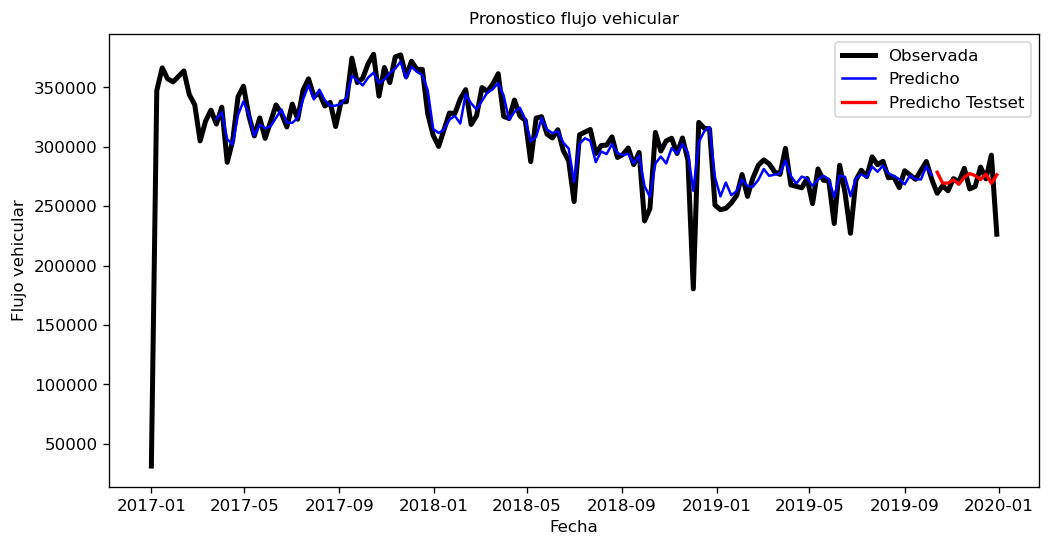

MAE Train: 8174.87985469177
MAE Test: 12278.374761751411
RMSE Train: 12254.211016474179
RMSE Test: 17912.380402535448


In [107]:
plt.figure(figsize=(10,5))
plt.plot(semana.index[:Total], semana[:Total],lw = 3, color='black', label = 'Observada')
plt.plot(semana.index[LB: LB + S_train], y_train_pred, color='blue',label = 'Predicho')
plt.plot(semana.index[S_train+LB: Total], y_test_pred,color='red', lw = 2, label = 'Predicho Testset')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Flujo vehicular')
plt.title ('Pronostico flujo vehicular', fontsize=10)
plt.show()
MAE=mean_absolute_error(y_train, y_train_pred)
print('MAE Train:', MAE)
MAE=mean_absolute_error(y_test, y_test_pred)
print('MAE Test:', MAE)
rmse =np.sqrt( mean_squared_error(y_train, y_train_pred))
print('RMSE Train:',rmse)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE Test:', rmse)

Es posible evidenciar que con la optimizacion de los hiperparametros,  tanto el MAE como el RMS presentaron una disminucion, sin embargo, el costo computacioanal (al efectuar el Gridsearch) es alto.  Ahora bien, con respecto a la prediccion del flujo vehicular, se evidencia una amplia diferencia en su ajuste, con respecto a los valores observados para el año 2019. Lo anterior se debe a que principalmente el modelo solo tiene encuenta a los rezagos como variables explicativas del flujo vehicular, sin embargo pueden existir variables exogenas que esten afectando las dinamicas de la serie. Por ejemplo: comportamientos estacionales o choques estocasticos. Teniendo en cuenta esto,  se procede a utilizar modelos como  ARMA, ARIMA o Sarima  que capturan de mejor manera los componentes de la serie temporal y  por ende mejoran su desempeño.

#Modelos de prediccion de serie temporal: ARMA(P)(Q)

In [108]:
!pip install matplotlib-venn

In [109]:
#Modelo ARMA
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from numpy import sqrt


In [110]:
series = diario.cantidad_pasos
X = series.values
ar_train, ar_test = X[1:len(X)-7], X[len(X)-7:]
model = AutoReg(ar_train, lags=7)
results=model.fit()
print('Coefficients: %s' % results.params)

Coefficients: [ 6.87705905e+03  3.06960471e-01 -3.85372032e-02  4.17058286e-02
 -1.20391047e-02  4.06572973e-02  1.41193232e-01  3.62049564e-01]


Predicho=37990.155983, Real=24349.000000
Predicho=43480.045699, Real=38168.000000
Predicho=42822.434898, Real=40182.000000
Predicho=40163.673356, Real=30681.000000
Predicho=37608.871962, Real=26259.000000
Predicho=38498.791912, Real=34523.000000
Predicho=34305.415589, Real=21447.000000
Test MAE :8465.770
Test RMSE: 9420.019


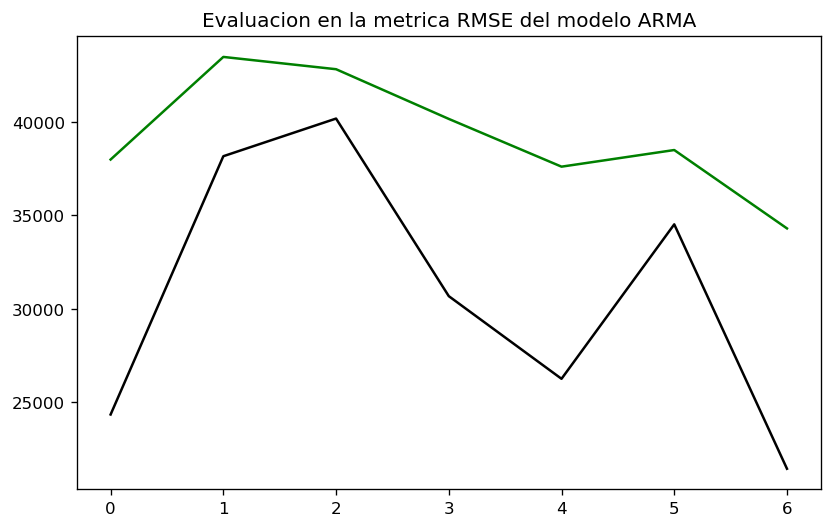

In [111]:
predic= results.predict(start=len(ar_train), end=len(ar_train)+len(ar_test)-1)
for i in range(len(predic)):
	print('Predicho=%f, Real=%f' % (predic[i], ar_test[i]))
MAE=mean_absolute_error(ar_test, predic)
rmse = sqrt(mean_squared_error(ar_test, predic))
print('Test MAE :%.3f'  %  MAE)
print('Test RMSE: %.3f' % rmse)
plt.figure(figsize=(8,5))
plt.plot(ar_test, color='Black')
plt.plot(predic, color='green')
plt.title('Evaluacion en la metrica RMSE del modelo ARMA')
plt.show()

Teniendo en cuenta los anteriores resultados, es posible notar que el modelo carece de exactitud al momento de predecir los valores reales. Esto principalmente  debido a que como vimos con anterioridad, el modelo arma, se comporta bien cuando la serie es estacionaria. Sin embargo, cuando la serie carece de estacionariedad se procede a diferenciar la serie para capturar de manera adecuada su comportamiento, y asi, tener una mejor prediccion.

##MODELO  DE PREDICCION: ARIMA (P)(D)(Q)

In [112]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [113]:
CP = diario.cantidad_pasos
SARIMAX_model = SARIMAX(CP, 
                        order=(2,1,2),
                        seasonal_order=(2, 1, 2, 7), 
                        enforce_stationarity=False,
                        enforce_invertibility=False)

In [114]:
res = SARIMAX_model.fit(disp=False)
print(res.summary())
plt.show()

                                     SARIMAX Results                                     
Dep. Variable:                    cantidad_pasos   No. Observations:                 1095
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 7)   Log Likelihood              -10876.900
Date:                           Wed, 09 Feb 2022   AIC                          21771.800
Time:                                   23:46:07   BIC                          21816.578
Sample:                               01-01-2017   HQIC                         21788.763
                                    - 12-31-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8862      0.267      3.313      0.001       0.362       1.410
ar.L2         -0.1501      0.081     -1.855

In [115]:
diario[0:10000]

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486
...,...
2019-12-27,40182
2019-12-28,30681
2019-12-29,26259


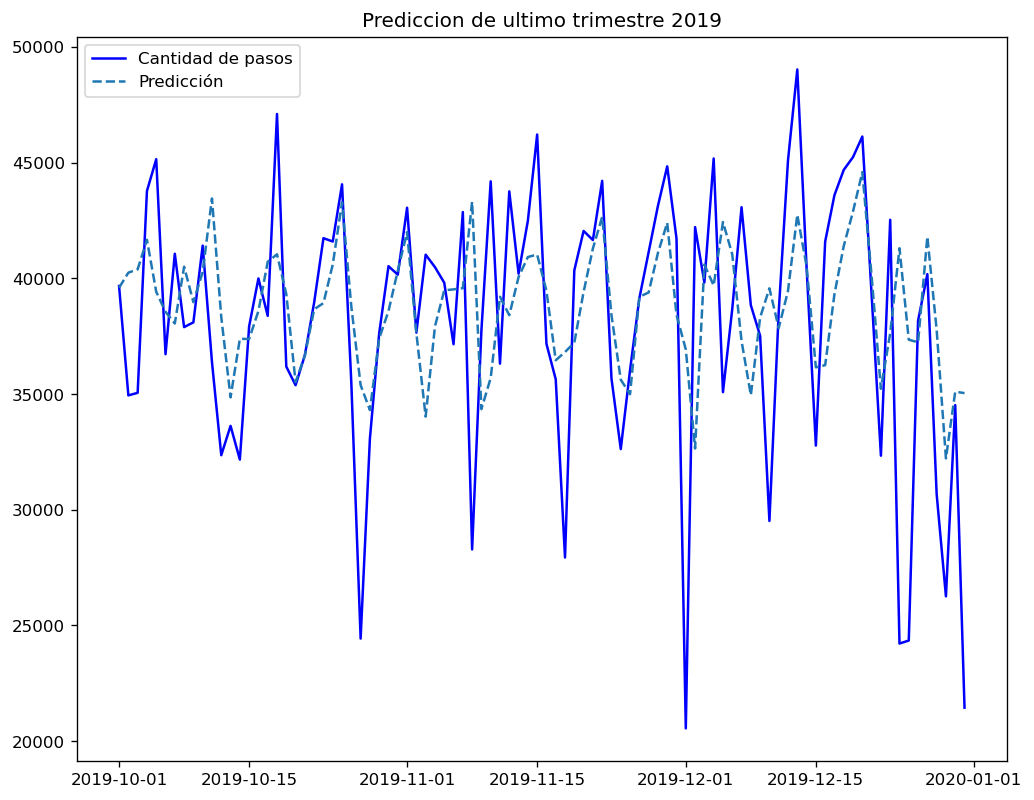

In [134]:
pred = res.predict(start=datetime.datetime(2019,10,1),dynamic=False)
diarios = diario.cantidad_pasos['2019-10-01':]
plt.figure(figsize=(10,8))
plt.plot(diarios, color ='Blue', label = 'Cantidad de pasos')
y_pred = pred
y_real = diario.cantidad_pasos['2019-10-01':]
plt.plot(pred,'--',label = 'Predicción')
plt.title('Prediccion de ultimo trimestre 2019')
plt.legend()
plt.show()

In [122]:
rmse = np.sqrt(mean_squared_error(y_real, y_pred))
print('Test RMSE: %.3f' % rmse)
MAE = mean_absolute_error( y_real,y_pred)
print('Test MAE : %.3f'  %  MAE)

Test RMSE: 5256.241
Test MAE : 3720.499


Es posible evidenciar un mejor ajuste del pronostico de la serie cuando se utiliza un modelo de sarima, el cual no solo  incorpora la diferenciacion de la serie cuando esta misma no es estacionaria, sino que ademas, captura el componente estacional de la serie. Es asi como, para este caso, se evidencia que el modelo sarima, tiene un mejor desempeño que el modelo arma y que el modelo de benchmark, ya que como se puede evidenciar con anterioridad, el desempeño en las metricas MAE y RMSE son mas bajos, lo que permite intuir que hay menos errores en la prediccion. 

3.1. Evaluación de la normalidad y correlación de los errores

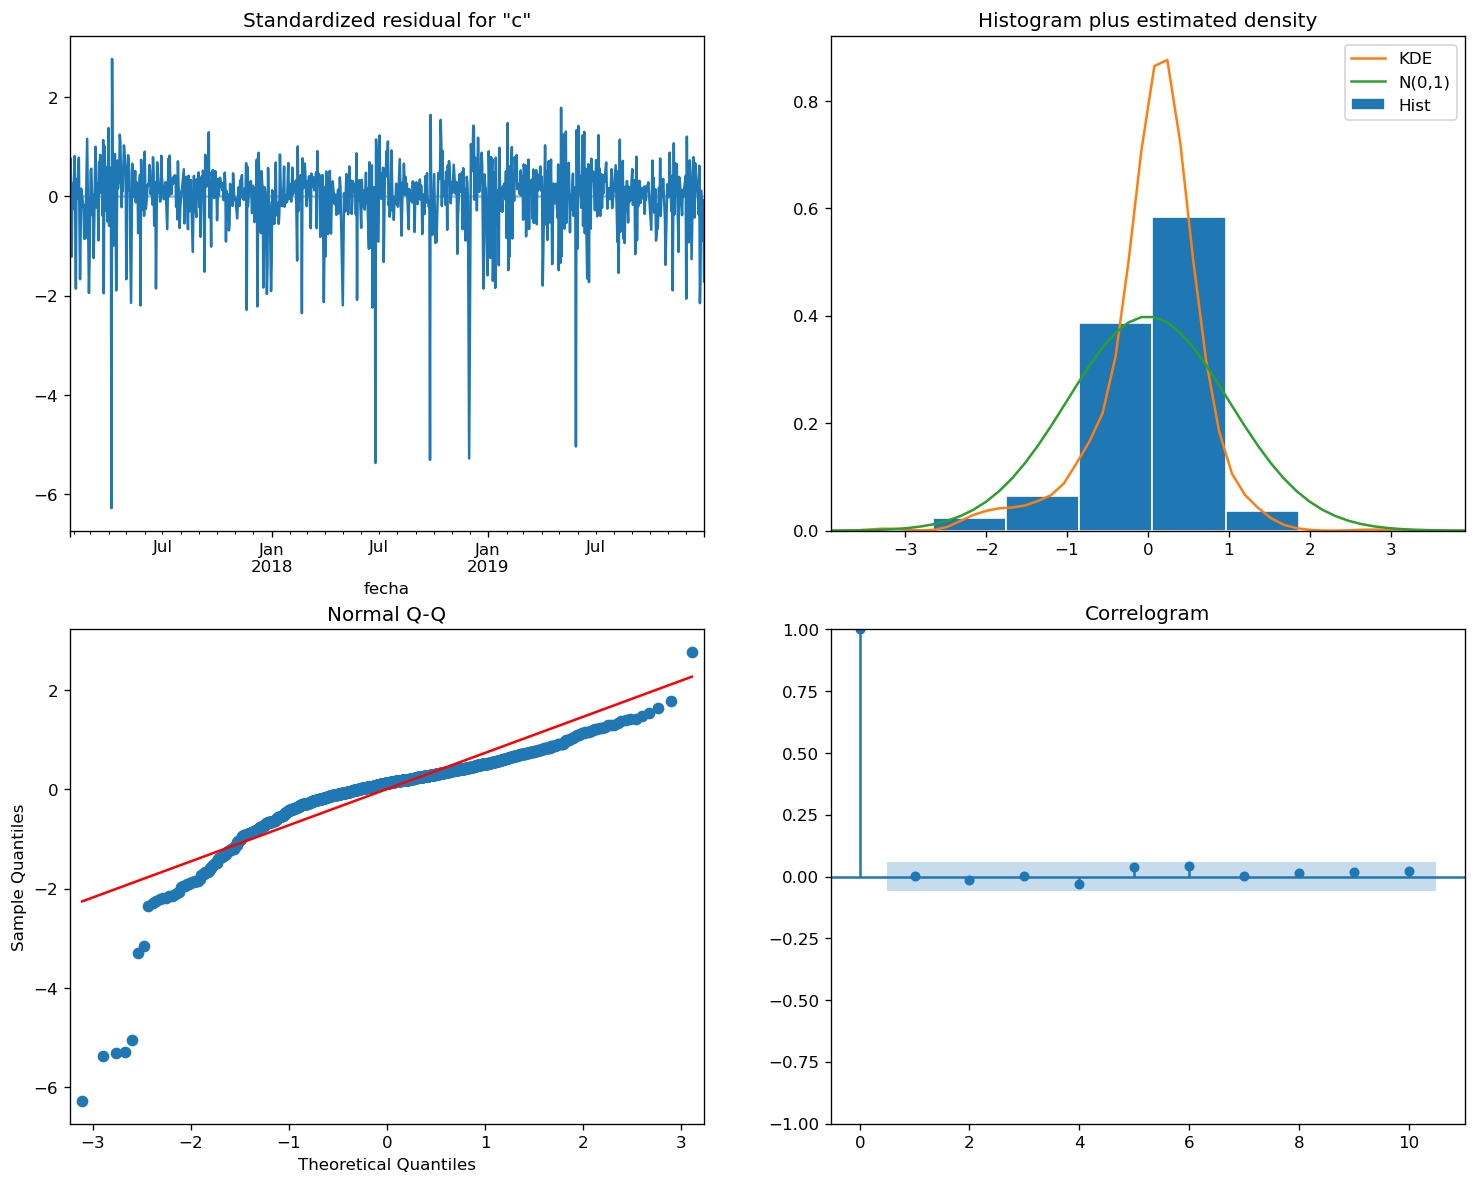

In [123]:
diagnostico = res.plot_diagnostics(figsize=(15, 12))
plt.show()

En el grafico anterior, es posible ver que la serie es estacionaria en 0, cuya distribucion se comporta como una normal, y que ademas no padece de autocorrelación en los residuos, afirmando que es ruido blanco lo que se observa.

## 4- Prediccion de flujo vehicular 2020

In [137]:
data_2020_2 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')
data_2020_2.head()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [144]:
#Se unen los 3 datasets
data_1 = pd.concat([ data_2020_2, data_2019, data_2018])

data_1['fecha'] = data_1['fecha'].apply(lambda x: x[:10])
data_1['estacion'] = data_1['estacion'].str.upper()
data_1['forma_pago'] = data_1['forma_pago'].str.upper()
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo

mask = np.logical_and(data_1.estacion =='ILLIA', data_1.forma_pago == 'EFECTIVO')
data_1 = data_1[mask]
#Quitamos las columnas que no vamos a utilizar
data_1.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
data_1.head()

,fecha,mes,dia,dia_fecha,hora_fin,tipo_vehiculo,observacion,sentido,cantidad_pasos
52,2020-01-01,enero,Miércoles,1.0,1.0,Auto,Efectivo,Centro,326.0
53,2020-01-01,enero,Miércoles,1.0,1.0,Auto,Efectivo,Provincia,319.0
134,2020-01-01,enero,Miércoles,1.0,2.0,Auto,Efectivo,Centro,199.0
135,2020-01-01,enero,Miércoles,1.0,2.0,Auto,Efectivo,Provincia,180.0
202,2020-01-01,enero,Miércoles,1.0,3.0,Auto,Efectivo,Centro,114.0


In [149]:
data_1.sort_values('fecha', inplace = True)
data_1['fecha'] = pd.to_datetime(data_1['fecha'])


In [150]:
data_1['hora'] = data_1['fecha'].dt.time
data_1['año'] = data_1['fecha'].dt.year

In [147]:
data_1.drop(columns=['dia_fecha','hora_fin'], inplace = True)

In [152]:
diario_n = data_1.resample('D', on = 'fecha').sum()
print(diario_n.shape)
diario_n.head()

(1096, 2)


,cantidad_pasos,año
fecha,,
2018-01-01,30735.0,401582
2018-01-02,47130.0,567058
2018-01-03,48162.0,552932
2018-01-04,47953.0,526698
2018-01-05,49505.0,552932


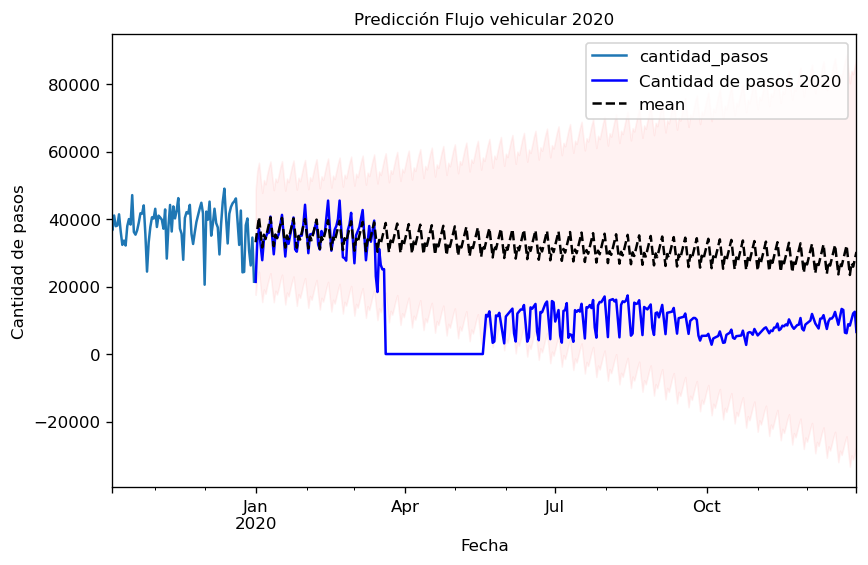

In [154]:
fig, ax = plt.subplots(figsize=(8, 5))
diario['cantidad_pasos'].loc['2019-10-01':].plot(ax=ax)
dias_20 = diario_n.cantidad_pasos['2020-01-01':]
plt.plot(dias_20, color ='Blue', label = 'Cantidad de pasos 2020')
forecast = res.get_forecast(steps=datetime.datetime(2020,12,31)).summary_frame()
forecast['mean'].plot(ax=ax, style='k--')
ax.fill_between(forecast.index, forecast['mean_ci_lower'], forecast['mean_ci_upper'], color='red', alpha=0.05);
plt.xlim(datetime.datetime(2019,10,6), datetime.datetime(2020,12,31))

ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de pasos')
plt.title("Predicción Flujo vehicular 2020",fontsize=10)
plt.legend()

Como se puede evidenciar con la grafica anterior, el modelo si predice adecuadamente los datos observados para el año 2020. No obstante, es posible evidenciar que después de mediados de abril, hay una caída predominante en el  flujo vehicular de vehículos por los peajes. Esto se debe a que en Argentina se empezaron a implementar medidas de aislamiento preventivo, tras detectar los primeros casos de covid en el país.

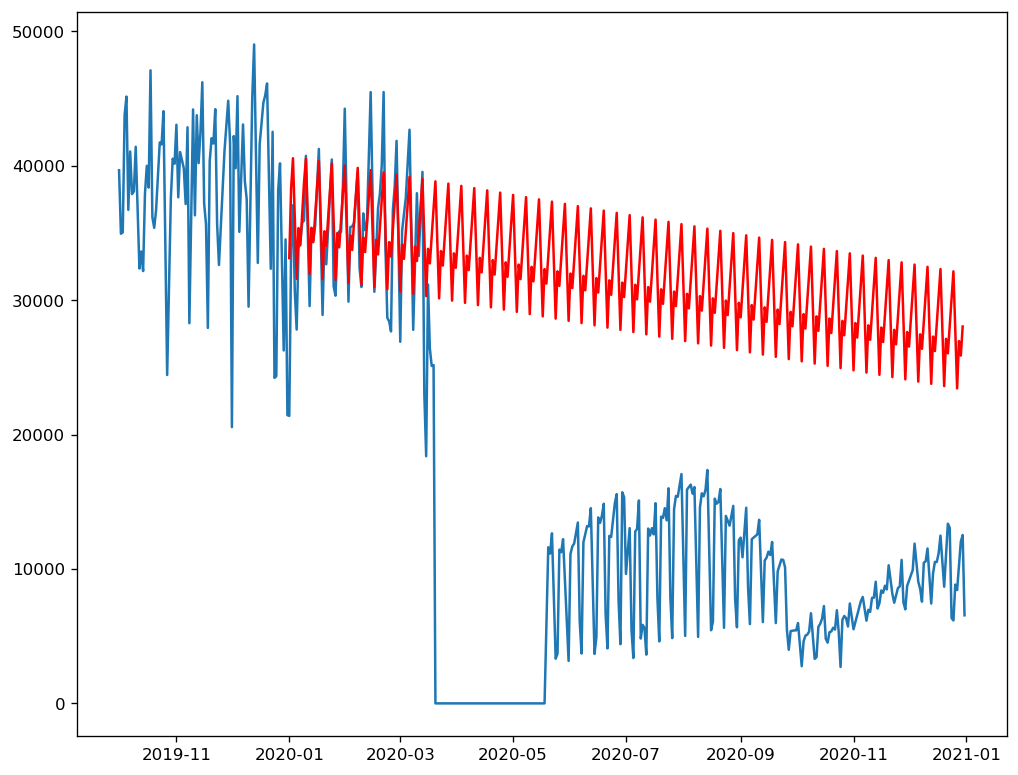

In [158]:
axax_2 = diario_n['cantidad_pasos'].loc['2019-10-01':]
forecast_2 = forecast['mean'].loc[:'2020-12-30']
plt.figure(figsize=(10,8))
plt.plot(axax_2)
plt.plot(forecast_2,color='red')
plt.show()

Tomando en cuenta los anteriores resultados, es posible evidenciar que el modelo de forecasting es un modelo que nos da un buen desempeño y ajuste para los datos de 2019 , lo que sugiere una aproximación adecuada para el primer trimestre de 2020. Ahora bien, Teniendo en cuenta que la serie temporal presenta comportamientos lineales, este modelo de forecasting es una buena aproximación para la predicción del flujo vehicular para el año 2020. Sin embargo, en caso en que la serie tuviera comportamientos no lineales se sugeriría utilizar otros modelos como el de redes neuronales para evaluar si existen mejoras en las métricas seleccionadas, principalmente porque son capaces de modelar y predecir series temporales lineales y no lineales con un alto grado de precisión, mapeando cualquier tipo de correlación entre los datos.


### Para pensar, investigar y, opcionalmente, implementar
¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
?

1. Para incluir informacion de otro tipo de variables en el modelo, utilizaria modelos de series de tiempo multivariantes, debido a que variables como tipo de vehiculo, foma de pago, entre otros, son variables que tambien dependen del tiempo (Como se pudo ver, lineas anteriores , el tipo de pago, puede estar altamente correlacionado con la fecha en la que se empezo a implementar telepase). Para este caso, si las variables que introducimos en el modelo, son realmente variables explicativas del comportamiento del flujo vehicular, introducirlas en el modelo, permitiria capturar no solo la informacion endogena, sino la informacion exogena que afecta la variable a estimar. En este caso, es aconsejable revisar que efectivamente las variables introducidas mejoran  la prediccion, y no el contrario, que agregan ruido a la serie.

¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?



2.  Es posible que el comportamiento promedio de la serie de tiempo sea similar para peajes urbanos, es decir, peajes con sentido hacia el centro de la ciudad, ya que el flujo de carros hacia el centro de la ciudad puede estar correlacionado a viajes de trabajo, obligaciones, etc.  Un claro ejemplo de lo anterior, son los peajes que corresponden a: Peaje Avellaneda y el Peaje Dellepiane, los cuales  tienen una impotante cercamia y conectan a las principales viaas de la ciudad. Sin embargo, si comparamos las series de tiempo de peajes con sentido contrario, como el de provincia,   es posible encontrar diferencias en el comportamiento promedio de la serie, lo anterior, debido a que pueden ser rutas con un  menor flujo vehicular,  por ser zonas de perisferia.

Sin embargo,  para corroborar esta informacion, podriamos utilizar informacion anonimizada del lugar de residencia de los conductores del vehiculo, para asi mapear las direccion de transito. De igual foma, al utilizar un identificador unico del vehiculo, podriamos identificar el numero de pasos de cada vehiculo por cada peaje, entendiendo asi,   las dinamicas de movilidad de la ciudad y asociandolo potencialmente al tipo y/o uso del vehiculo. 

 ¿Hay algo que te gustaría investigar o probar?

3. Existen varias preguntas que quisieramos responder con los dataset de Flujo vehicular 2017-2021.  Una de las preguntas que mas  nos gustaria responder es ¿En que medida o magnitud  las cuarentenas estrictas afectaron el numero de pasos promedio de vehiculos por los peajes? ¿Como el covid afecto el metodo de pago de los vehiculos?¿Potencializo el uso de 'telepase' como sistema de pago?¿El covid aumento el flujo de vehiculos con sentido a provincias, en comparacion con el flujo de vehiculos que se dirigian al centro de la ciudad?. Como lo pudimos observar en el inicio del proceso de exploración de los datos, al filtrar nuestro dataset por el medio de pago TelePase la tendencia es completamente contraria a la obtenida por el medio de pago efectivo. Esto indica que algunas de nuestras preguntas anteriores podrían tener sentido. 

Adicionalmente algo que deseariamos implementar posteriormente es el realizar la predicción por medio de redes neuronales, especificamente la LSTM un tipo especial de redes recurrentes, las cuales según una breve investigación resultan muy convenientes para la predicción de series cronológicas.









